<a href="https://colab.research.google.com/github/DEBMALYASEN/ABC/blob/master/CARDIO1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
# THIS PROGRAM CLASSIFIES WHETHER A PERSON HAS CARDIOVASCULAR DISEASE OR NOT

In [24]:

#IMPORT LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns

In [25]:
#load the data
from google.colab import files
upoladed=files.upload()

Saving cardio_train.csv to cardio_train (1).csv


In [26]:
#STORE DATA IN VARIABLE
df=pd.read_csv('cardio_train.csv',sep=";")
#PRINT FIRST 10 ROWS
df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [27]:
#GET SHAPE OF DATA
df.shape


(70000, 13)

In [28]:
df.drop("id",axis=1,inplace=True)

In [29]:
df.head(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [30]:
#COUNT EMPTY VALUES IN DATA
df.isna().sum()


age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [31]:
#ANoTHER WAY TO CHECK FOR NULL VALUE
df.isnull().values.any()


False

In [32]:
#VIEW SOME BASIC STATISTICS
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
#GET A COUNT OF NUMBER OF PATIENTS WITH A HEART DISEASE AND NOT WITH A HEART DISEASE
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

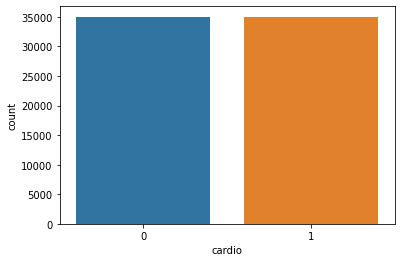

In [34]:
#VISUALIZE THE COUNT
sns.countplot(df['cardio'])

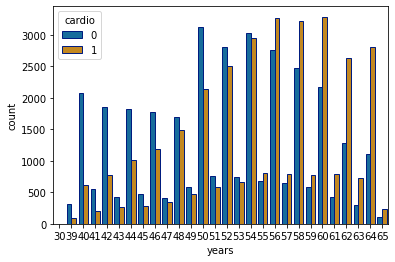

In [35]:
#LOOK AT THE NUMBER OF PEOPLE WITH A CARDIOVASCULAR DISEASE THAT EXCEEDS NUMBER OF PEOPLE WITHOUT A CARDIO VASCULAR DISEASE
#CREATE A YEARS COLUMN
df['years']=(df['age']/365).round(0)
df['years']=pd.to_numeric(df['years'],downcast='integer')

#VISUALIZE
sns.countplot(x='years',hue='cardio',data=df,palette='colorblind',edgecolor=sns.color_palette('dark',n_colors=1))

In [36]:
#GET THE CORRELATION OF THE COLUMNS
df.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
age,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159,0.999090
gender,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109,-0.023017
height,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821,-0.081456
weight,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660,0.053661
ap_hi,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475,0.020793
ap_lo,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719,0.017754
cholesterol,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147,0.154386
gluc,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307,0.098596
smoke,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486,-0.047884
alco,-0.029723,0.170966,0.094419,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330,-0.029918


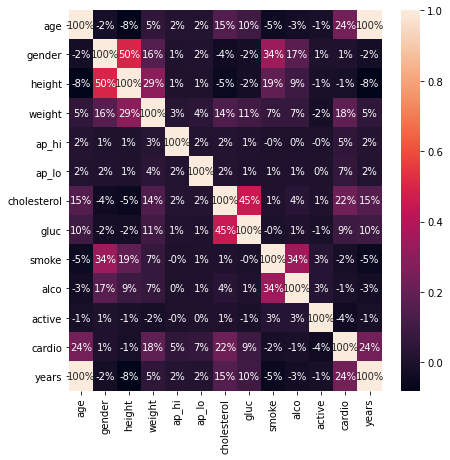

In [38]:
#VISUALIZE THE DATA
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))    # 7*7 INCHES
sns.heatmap(df.corr(),annot=True,fmt='.0%')# fmt = format

In [39]:
df.head(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48
5,21914,1,151,67.0,120,80,2,2,0,0,0,0,60
6,22113,1,157,93.0,130,80,3,1,0,0,1,0,61
7,22584,2,178,95.0,130,90,3,3,0,0,1,1,62
8,17668,1,158,71.0,110,70,1,1,0,0,1,0,48
9,19834,1,164,68.0,110,60,1,1,0,0,0,0,54


In [40]:
#DROP YEARS COLUMN
df=df.drop('years',axis=1)

In [41]:
df.head(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [66]:
#SPLIT THE DATA INTO FEATURE AND TARGET DATA
X=df.iloc[:,:-1].values#ALL THE ROWS ALL THE COLUMN EXCEPT LAST COLUMN
Y=df.iloc[:,-1].values#ALL ROWS OF THE LAST COLUMN

In [67]:
X

array([[1.8393e+04, 2.0000e+00, 1.6800e+02, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [2.0228e+04, 1.0000e+00, 1.5600e+02, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [1.8857e+04, 1.0000e+00, 1.6500e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [1.9066e+04, 2.0000e+00, 1.8300e+02, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [2.2431e+04, 1.0000e+00, 1.6300e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0540e+04, 1.0000e+00, 1.7000e+02, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00]])

In [68]:
Y

array([0, 1, 1, ..., 1, 1, 0])

In [69]:
#SPLIT THE DATA INTO TRAIN(75%) AND TEST(25%) DATA
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.25,random_state=1)

In [70]:
#FEATURE SCALING
#SCALE THE VALUES BETWEEN 0 AND 1 INCLUSIVE
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [71]:
X_train

array([[-0.4454203 , -0.73462899, -0.77533485, ..., -0.31243322,
        -0.23931996,  0.49648558],
       [-0.81999799,  1.36123134,  2.86773208, ..., -0.31243322,
        -0.23931996, -2.01415718],
       [-0.80825447,  1.36123134,  0.0747141 , ..., -0.31243322,
        -0.23931996,  0.49648558],
       ...,
       [-0.57338413,  1.36123134,  1.65337643, ..., -0.31243322,
        -0.23931996,  0.49648558],
       [ 1.00915598, -0.73462899,  0.56045636, ..., -0.31243322,
        -0.23931996, -2.01415718],
       [ 0.48839176, -0.73462899,  1.16763418, ..., -0.31243322,
        -0.23931996,  0.49648558]])

In [72]:
X_test.shape

(17500, 11)

In [73]:
X_train.shape

(52500, 11)

In [74]:
#USE RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=1)
forest.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [75]:
#TEST THE MODEL ACCURACY ON TRAINING
model=forest
model.score(X_train,Y_train)

0.979904761904762

In [76]:
#TEST THE MODEL ACCURACY ON TEST DATA
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,model.predict(X_test))

TN=cm[0][0]
TP=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

#PRINT CONFUSION MATRIX

print(cm)


#PRINT MODEL ACCURACY ON TEST DATA

print('Model test accuracy is{}'.format((TP+TN)/(TP+TN+FN+FP)))

[[6589 2020]
 [3349 5542]]
Model test accuracy is0.6932
